# Introduction to pandas Data Structures
To get started with pandas, you will need to get comfortable with its two workhorse
data structures:<b> Series and DataFrame</b>. While they are not a universal solution for
every problem, they provide a solid, easy-to-use basis for most applications.

# Pandas Series Object

<b>A Series</b> is the primary building block of pandas.

Series represents a one-dimensional labeled indexed array based on the NumPy ndarray.

Like an array, a Series can hold zero or more values of any single data type

# Creating Series
A Series can be created and initialized by passing either a <b>scalar value,
a NumPy ndarray, a Python list, or a Python Dict</b> as the data parameter of
the Series constructor. This is the default parameter and does not need to
be specified if it is the first item.

In [3]:
import numpy as np
import pandas as pd

In [4]:
# create one item Series
s1 = pd.Series(2)
s1

0    2
dtype: int64

In [5]:
# create a series of multiple items from a list
s2 = pd.Series([1, 2, 3, 4, 5])
s2

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [6]:
# get the values in the Series
s2.values

array([1, 2, 3, 4, 5], dtype=int64)

In [7]:
# get the index of the Series
s2.index

RangeIndex(start=0, stop=5, step=1)

In [8]:
# explicitly create an index
# index is alpha, not integer
s3 = pd.Series([1, 2, 3], index=['a', 'b', 'c']) 
s3

a    1
b    2
c    3
dtype: int64

In [9]:
# lookup by label value, not integer position
print(f"vlaue by label 's3['c']' is {s3['c']} and vlaue by index 's3[2]'is {s3[2]}")
# access both by label and index

vlaue by label 's3['c']' is 3 and vlaue by index 's3[2]'is 3


In [10]:
# create Series from an existing index
# scalar value with be copied at each index label
s4 = pd.Series(["A","B","C","D","E"], index=s2.index)
s4

0    A
1    B
2    C
3    D
4    E
dtype: object

In [11]:
# create Series from dict
s4 = pd.Series({'a': 1,
                'b': 2,
                'c': 3, 
                'd': 4})
s4

a    1
b    2
c    3
d    4
dtype: int64

In [12]:
s5 = pd.Series(np.array([22,33,44,55,66]))
s5

0    22
1    33
2    44
3    55
4    66
dtype: int32

<h3>Size, shape, uniqueness, and counts of values</h3>

In [13]:
# example series, which also contains a NaN
s = pd.Series([0, 1, 1, 2, 3, 4, 4, 5, 6, 7,np.nan]) 
# numpy nan property is used here to create an NaN 


In [14]:
print(len(s))
print(s.size)
print(s.shape)
print(s.count()) # count return not null values
print(s.unique())
print(s.value_counts())

11
11
(11,)
10
[ 0.  1.  2.  3.  4.  5.  6.  7. nan]
4.0    2
1.0    2
7.0    1
6.0    1
5.0    1
3.0    1
2.0    1
0.0    1
dtype: int64


<h3>Peeking at data with heads, tails, and take</h3>

In [15]:
# first five
s.head()

0    0.0
1    1.0
2    1.0
3    2.0
4    3.0
dtype: float64

In [16]:
# first three
s.head(n = 3) # s.head(3) is equivalent

0    0.0
1    1.0
2    1.0
dtype: float64

In [17]:
# last five
s.tail()

6     4.0
7     5.0
8     6.0
9     7.0
10    NaN
dtype: float64

In [18]:
# last 3
s.tail(n = 3) # equivalent to s.tail(3)

8     6.0
9     7.0
10    NaN
dtype: float64

In [19]:
#The .take() method will return the rows in a series that correspond to the zero-based positions:

# only take specific items

s.take([9, 3, 9])

9    7.0
3    2.0
9    7.0
dtype: float64

# Looking up values in Series

In [20]:
# single item lookup

print(s3)
s3['a']

a    1
b    2
c    3
dtype: int64


1

In [21]:
#Accessing this Series using an integer value will perform a zero-based position lookup of the value:

# lookup by position since the index is not an integer
s3[1]

2

In [22]:
# multiple items
s3[['c', 'a']]

c    3
a    1
dtype: int64

In [23]:
# series with an integer index, but not starting with 0
s5 = pd.Series([1, 2, 3], index=[2, 3, 4])  
s5

2    1
3    2
4    3
dtype: int64

# label-based lookup versus position-based lookup

In [24]:
s5[2]  # 2 is considered as label based look up
       # coz label also has 2 init

1

In [25]:
s5[0]   # now see in this case we have integer label lookup,position lookup is not working

KeyError: 0

In [ ]:
s5.loc[2]  # loc also works on label based look up

In [ ]:
s5.iloc[0]  #iLoc forcefully works on position based look up even you dont specify position based index

In [ ]:
# multiple items by label (loc)
s5.loc[[4, 3]]

In [ ]:
s5[[0,2]]

In [ ]:
s5.iloc[[0,2]]

In [26]:
s5.iloc[[0,2,3]]  # integr location will throw exception

IndexError: positional indexers are out-of-bounds

# Alignment via index labels

A fundamental difference between a NumPy ndarray and a pandas Series is the
ability of a Series to automatically align data from another Series based on label
values before performing an operation.

In [ ]:
s6 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s6

In [27]:
s7 = pd.Series([4, 3, 2, 1], index=['d', 'c', 'b', 'a'])
s7

d    4
c    3
b    2
a    1
dtype: int64

In [28]:
# add them
s6 + s7    #it first alligns the data as per label then performs operation

NameError: name 's6' is not defined

 <h3>Nan + number = NaN </h3>      (NaN added to a number results in NaN)
    
<h3>number + NaN = NaN</h3>        (Number added to a Nan results in NaN)


In [29]:
s8 = pd.Series({'a': 1, 'b': 2, 'c': 3, 'd': 5})
s8

a    1
b    2
c    3
d    5
dtype: int64

In [30]:
s9 = pd.Series({'b': 6, 'c': 7, 'd': 9, 'e': 10})
s9

b     6
c     7
d     9
e    10
dtype: int64

In [31]:
# NaN's result for a and e
# demonstrates alignment
s8 + s9

a     NaN
b     8.0
c    10.0
d    14.0
e     NaN
dtype: float64

In [32]:
s10 = pd.Series([1.0, 2.0, 3.0], index=['a', 'a', 'b'])
s10

a    1.0
a    2.0
b    3.0
dtype: float64

In [33]:
s11 = pd.Series([4.0, 5.0, 6.0], index=['a', 'a', 'c'])
s11

a    4.0
a    5.0
c    6.0
dtype: float64

When the two Series objects are added (or any other operation performed), the
resulting Series has four 'a' index labels.

In [34]:
s10 + s11

a    5.0
a    6.0
a    6.0
a    7.0
b    NaN
c    NaN
dtype: float64

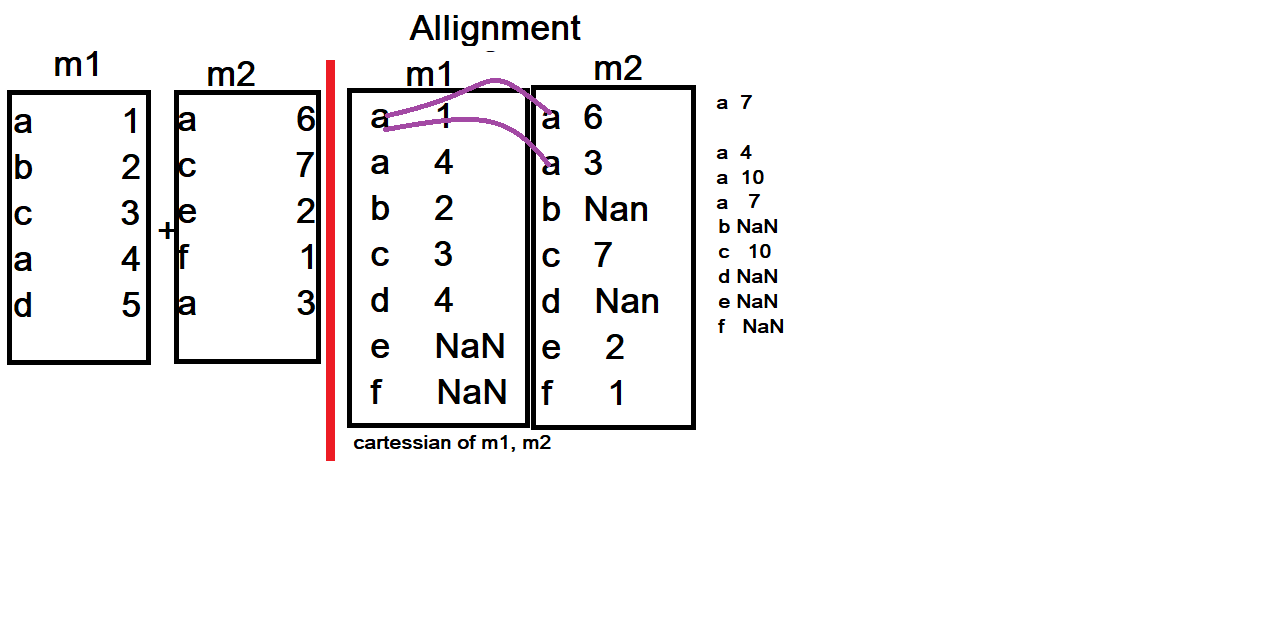

# The special case of Not-A-Number (NaN)

In [35]:
# mean of numpy array values
nda = np.array([1, 2, 3, 4, 5])
nda.mean()

3.0

In [36]:
# mean of numpy array values with a NaN
nda = np.array([1, 2, 3, 4, np.NaN])
nda.mean()

nan

In [37]:
# ignores NaN values
s = pd.Series(nda)      
s.mean()

2.5

In [38]:
# handle NaN values like NumPy
s.mean(skipna=False)

nan

# Boolean Selection

In [39]:
# which rows have values that are > 5?
s = pd.Series(np.arange(0, 10))

s > 5

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9     True
dtype: bool

In [40]:
# select rows where values are > 5
logicalResults = s > 5
s[logicalResults]

6    6
7    7
8    8
9    9
dtype: int32

In [41]:
# a little shorter version
s[s > 5]

6    6
7    7
8    8
9    9
dtype: int32

In [42]:
# commented as it throws an exception
# s[s > 5 and s < 8]

# correct syntax
s[(s > 5) & (s < 8)]

6    6
7    7
dtype: int32

In [43]:
pd.Series([True, False, False, True, True]).all(),pd.Series([True, False, False, True, True]).any()

(False, True)

In [44]:
(np.array([True,False,True,True])).sum()

3

In [45]:
# are all items >= 0?
(s >= 0).all()

True

In [46]:
s < 2

0     True
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [47]:
# any items < 2?
(s[s < 2].any())

True

In [48]:
# how many values < 2?
(s < 2).count()

10

# Reindexing a Series

Reindexing in pandas is a process that makes the data in a Series or DataFrame
match a given set of labels. This is core to the functionality of pandas as it enables
label alignment across multiple objects, which may originally have different
indexing schemes.
This process of performing a reindex includes the following steps:
1. Reordering existing data to match a set of labels.
2. Inserting NaN markers where no data exists for a label.
3. Possibly, filling missing data for a label using some type of logic (defaulting
to adding NaN values).

In [49]:
# sample series of five items
s = pd.Series(np.random.randn(5))
s

0    0.493330
1    1.734023
2    0.632139
3   -0.830808
4   -0.556488
dtype: float64

In [50]:
# change the index
s.index = ['a', 'b', 'c', 'd', 'e']
s

a    0.493330
b    1.734023
c    0.632139
d   -0.830808
e   -0.556488
dtype: float64

let's examine a slightly more practical example. The following code concatenates
two Series objects resulting in duplicate index labels, which may not be desired in the
resulting Series:

In [51]:
# concat copies index values verbatim (as it is),
# potentially making duplicates since we have some or all label index same
np.random.seed(123456)

s1 = pd.Series(np.random.randn(3))

s2 = pd.Series(np.random.randn(3))

combined = pd.concat([s1, s2])
combined


0    0.469112
1   -0.282863
2   -1.509059
0   -1.135632
1    1.212112
2   -0.173215
dtype: float64

In [52]:
# reset the index so that duplication of index may be removed
combined.index =np.arange(0, len(combined))
combined

0    0.469112
1   -0.282863
2   -1.509059
3   -1.135632
4    1.212112
5   -0.173215
dtype: float64

Reindexing using the .index property in-place modifies the Series.

# reindex() method
Greater flexibility in creating a new index is provided using the .reindex() method.
An example of the flexibility of .reindex() over assigning the .index property
directly is that the list provided to .reindex() can be of a different length than the
number of rows in the Series:

In [53]:
np.random.seed(123456)
s1 = pd.Series(np.random.randn(4), ['a', 'b', 'c', 'd'])
print(s1)
# reindex with different number of labels
# results in dropped rows and/or NaN's


s2 = s1.reindex(['a', 'c', 'g'])
s2

a    0.469112
b   -0.282863
c   -1.509059
d   -1.135632
dtype: float64


a    0.469112
c   -1.509059
g         NaN
dtype: float64

Things to be noted: 
    1. reindex() donot re-index inplace, it will return a new series original will not be modified
    2. if any index not matching the previous index will be assigned NaN
    3. The index present in previous indexes, if not included in re-index 
        then the row will not be added in new series. 

In [54]:
combined.reindex([9,5,3,4,0,1,2,6,11])  # not in place

9          NaN
5    -0.173215
3    -1.135632
4     1.212112
0     0.469112
1    -0.282863
2    -1.509059
6          NaN
11         NaN
dtype: float64

In [55]:
combined   # last indexing is still there.

0    0.469112
1   -0.282863
2   -1.509059
3   -1.135632
4    1.212112
5   -0.173215
dtype: float64

Reindexing is also useful when you want to align two Series to perform an
operation on matching elements from each series; however, for some reason,
the two Series had index labels that will not initially align.
The following example demonstrates this, where the first Series has indexes as
sequential integers, but the second has a string representation of what would be
the same values:


In [56]:
# different types for the same values of labels
# causes big trouble
s1 = pd.Series([0, 1, 2], index=[0, 1, 2])
s2 = pd.Series([3, 4, 5], index=['0', '1', '2'])
s1 + s2

0   NaN
1   NaN
2   NaN
0   NaN
1   NaN
2   NaN
dtype: float64

you can easily guess what had happened here.

all values are NaN because the operation tries to add the item in the
first series with the integer label 0, which has a value of 0, but can't find the
item in the other series and therefore, the result is NaN (and this fails six times
in this case).

<h5>Once this situation is identified:</h5>
it becomes a fairly trivial situation to fix by
reindexing the second series:

In [57]:
# reindex by casting the label types and we will get the desired result

s2.index = s2.index.values.astype(int)
s1 + s2

0    3
1    5
2    7
dtype: int64

Overriding the default action of inserting <b>NaN</b> as a missing value during reindexing can
be changed by using the <b>fill_value</b> parameter of the method.

In [58]:
# fill with 0 instead of NaN
s2 = s.copy()
s2

a    0.493330
b    1.734023
c    0.632139
d   -0.830808
e   -0.556488
dtype: float64

In [59]:
s2_reindexed = s2.reindex(['a', 'f'], fill_value=0)
s2_reindexed

a    0.49333
f    0.00000
dtype: float64

<h3>ffill, bfill, & nearest</h3>

In [60]:
# create example to demonstrate fills
s3 = pd.Series(['red', 'green', 'blue' ], index=[0, 8, 10])
s3

0       red
8     green
10     blue
dtype: object

In [61]:
# forward fill example
s3.reindex(np.arange(0,15), method='ffill')

0       red
1       red
2       red
3       red
4       red
5       red
6       red
7       red
8     green
9     green
10     blue
11     blue
12     blue
13     blue
14     blue
dtype: object

In [62]:
# backwards fill example
s3.reindex(np.arange(0,15), method='bfill')

0       red
1     green
2     green
3     green
4     green
5     green
6     green
7     green
8     green
9      blue
10     blue
11      NaN
12      NaN
13      NaN
14      NaN
dtype: object

In [63]:
s3.reindex(np.arange(0,10), method='nearest') #nearest: use nearest valid observations to fill gap

0      red
1      red
2      red
3      red
4    green
5    green
6    green
7    green
8    green
9     blue
dtype: object

# Slicing a Series

In [64]:
# a Series to use for slicing
# using index labels not starting at 0 to demonstrate
# position based slicing

s = pd.Series(np.arange(100, 110), index=np.arange(10, 20))

# remember we pro 
s

10    100
11    101
12    102
13    103
14    104
15    105
16    106
17    107
18    108
19    109
dtype: int32

In [65]:

print(s[0:6:2])  # [startofrow:endofrow:step]

# # equivalent to
s.iloc[[0, 2, 4]]

10    100
12    102
14    104
dtype: int32


10    100
12    102
14    104
dtype: int32

In [66]:
# first five by slicing, same as .head(5)
s[:5]

10    100
11    101
12    102
13    103
14    104
dtype: int32

# Missing Data in Series

NaN values represent data is missing in the series


In [67]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [68]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [69]:
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [70]:
pd.isnull(obj4)  # obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [71]:
pd.notnull(obj4)  #obj4.notnull()

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [72]:
obj4.name = 'population'
obj4.index.name="state"
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

# The pandas DataFrame Object

A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string,
boolean, etc.). 

<h4>Creating a DataFrame from scratch</h4>

In [73]:
# create a DataFrame from a 2-d ndarray

df = pd.DataFrame(np.array([[10, 11, 12, 13], [20, 21, 22, 23]]))
df

# default row and columns indexes

,0,1,2,3
0,10,11,12,13
1,20,21,22,23


In [74]:
# create a DataFrame for a list of Series objects

df1 = pd.DataFrame([pd.Series(np.arange(10, 15)),
                    pd.Series(np.arange(15, 20))])
df1
# default row and columns indexes

,0,1,2,3,4
0,10,11,12,13,14
1,15,16,17,18,19


In [75]:
# create a DataFrame with two Series objects
# and a dictionary
s1 = pd.Series(np.arange(1, 6, 1))
s2 = pd.Series(np.arange(6, 11, 1))
df2= pd.DataFrame({'boys': s1, 'girls': s2})
df2

,boys,girls
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [76]:
# specify column names
df3 = pd.DataFrame(np.array([[10, 11], [20, 21]]),columns=['apples', 'oranges'])
df3

,apples,oranges
0,10,11
1,20,21


In [77]:
# create a DataFrame with named columns and rows

df4 = pd.DataFrame(np.array([[10, 11, 12, 13], [20, 21, 22, 23]]),
                  
                                            index=['apples', 'oranges'],
                                            columns=['Mon', 'Tue','Wed', 'Thu'])
df4

,Mon,Tue,Wed,Thu
apples,10,11,12,13
oranges,20,21,22,23


In [78]:
# demonstrate alignment during creation
s3 = pd.Series(np.arange(12, 14), index=[1, 2])
df5 = pd.DataFrame({'c1': s1, 'c2': s2, 'c3': s3})
df5

,c1,c2,c3
0,1,6,NaN
1,2,7,12.0
2,3,8,13.0
3,4,9,NaN
4,5,10,NaN


In [79]:
# Examples of creating data frames

In [80]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [81]:
pd.DataFrame(frame, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [82]:
frame.year

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

In [83]:
frame['pop']

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: pop, dtype: float64

In [84]:
# If you pass a column that isn’t contained in the dict(debt), it will appear with missing values
# in the result:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                              index=['one', 'two', 'three', 'four','five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [85]:
frame2.debt = "100"
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,100
two,2001,Ohio,1.7,100
three,2002,Ohio,3.6,100
four,2001,Nevada,2.4,100
five,2002,Nevada,2.9,100
six,2003,Nevada,3.2,100


In [86]:
frame2['debt']=np.arange(6)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4
six,2003,Nevada,3.2,5


In [87]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

In [88]:
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [89]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [90]:
frame2['greaterThan2']= frame2['pop'] > 2
frame2

,year,state,pop,debt,eastern,greaterThan2
one,2000,Ohio,1.5,NaN,True,False
two,2001,Ohio,1.7,-1.2,True,False
three,2002,Ohio,3.6,NaN,True,True
four,2001,Nevada,2.4,-1.5,False,True
five,2002,Nevada,2.9,-1.7,False,True
six,2003,Nevada,3.2,NaN,False,True


In [91]:
del frame2['eastern']

In [92]:
frame2

,year,state,pop,debt,greaterThan2
one,2000,Ohio,1.5,NaN,False
two,2001,Ohio,1.7,-1.2,False
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,True
five,2002,Nevada,2.9,-1.7,True
six,2003,Nevada,3.2,NaN,True


In [93]:
#Another common form of data is a nested dict of dicts:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio':   {2000: 1.5, 2001: 1.7, 2002: 3.6}}
df3 =pd.DataFrame(pop)
df3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


<b>If the nested dict is passed to the DataFrame, pandas will interpret the outer dict keys
as the columns and the inner keys as the row indices</b>

In [94]:
df3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [95]:
df3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [96]:
pop1 =pd.DataFrame(pop, index=[2001, 2002, 2003])
pop1

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [97]:
pdata = {'Ohio': df3['Ohio'][:-1],
        'Nevada': df3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [98]:
df3.index.name = 'year'; df3.columns.name = 'state'

# Index Objects